# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = (32, 32, 3)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

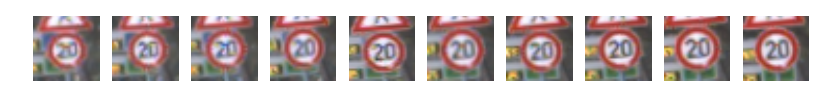

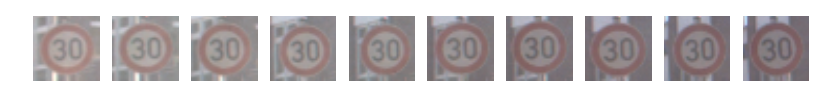

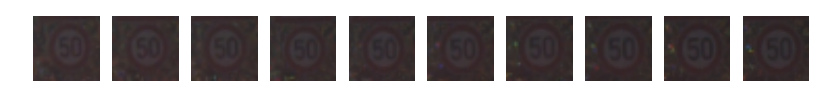

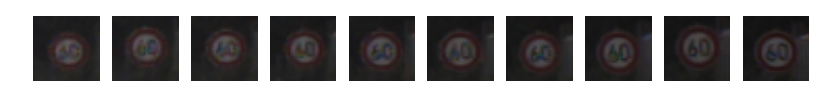

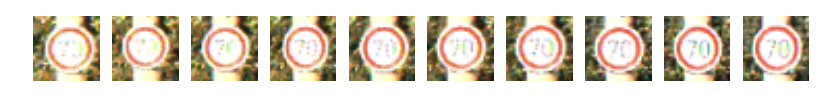

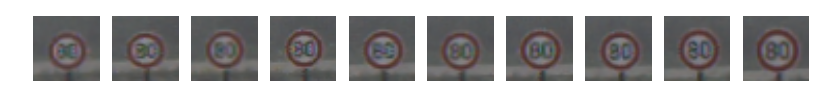

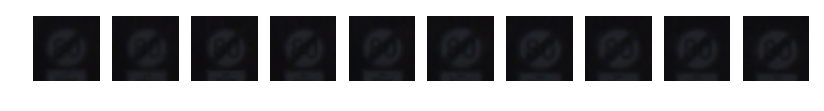

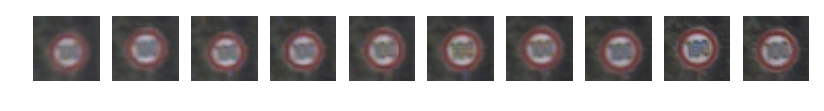

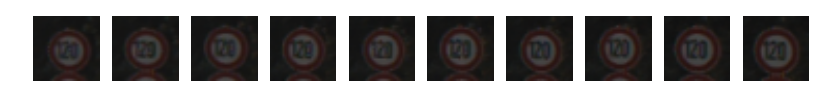

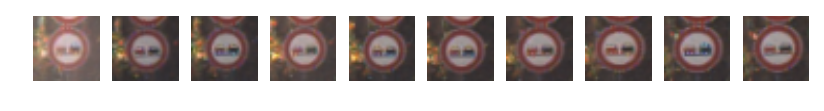

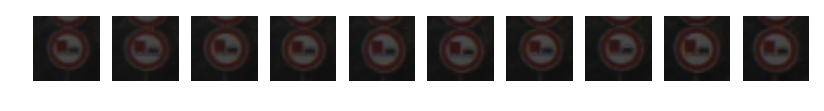

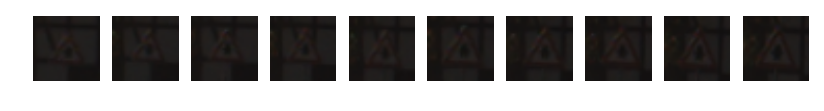

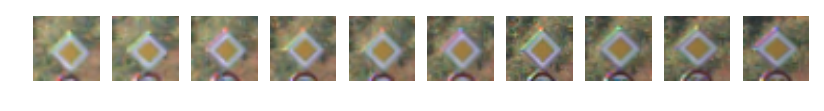

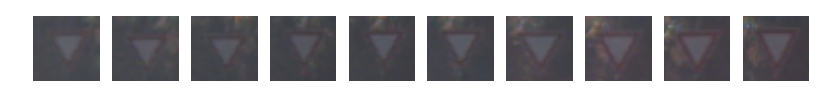

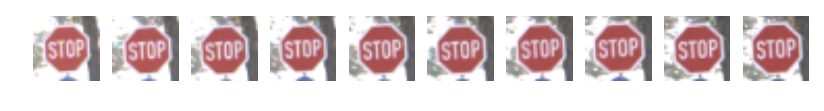

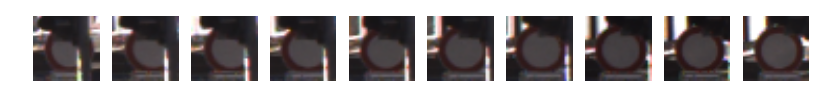

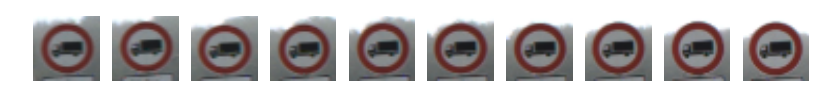

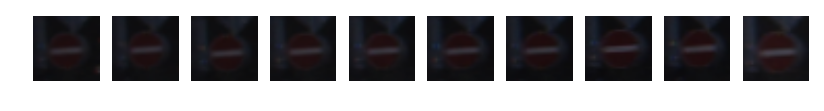

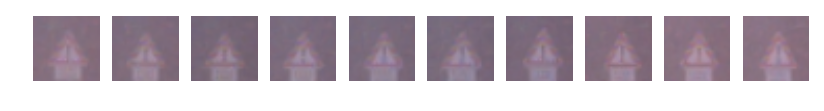

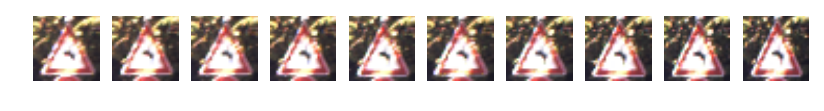

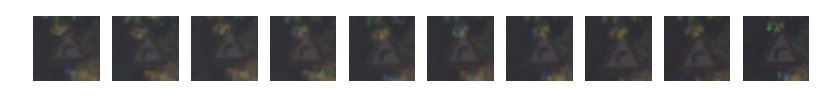

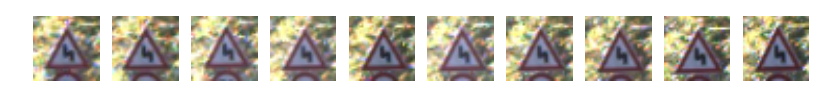

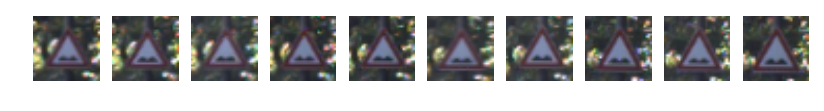

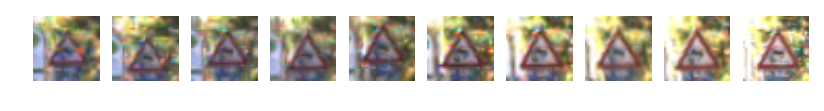

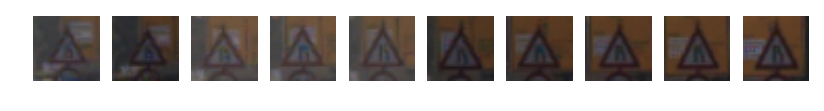

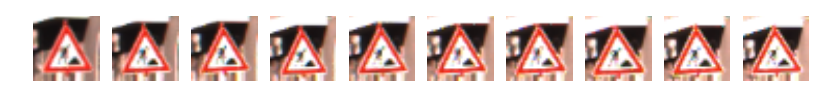

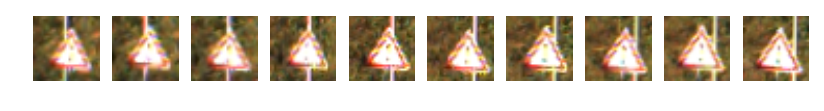

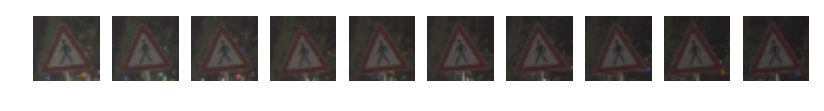

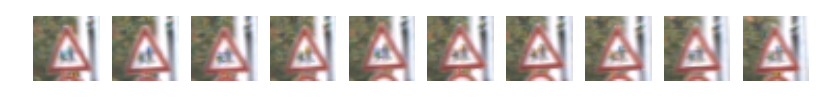

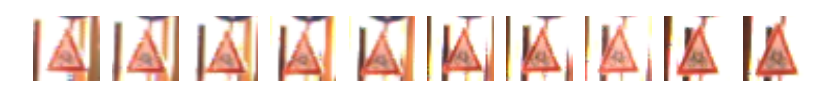

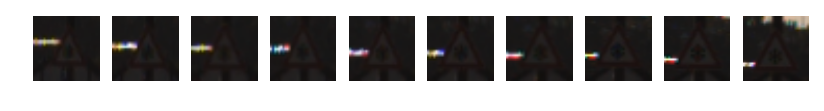

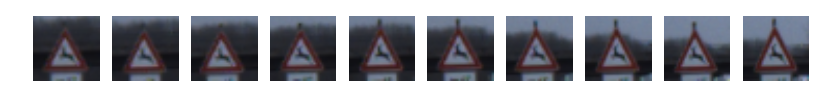

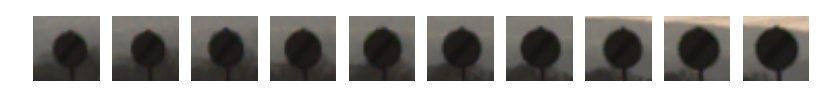

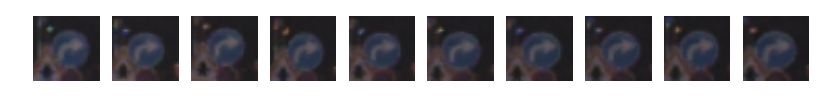

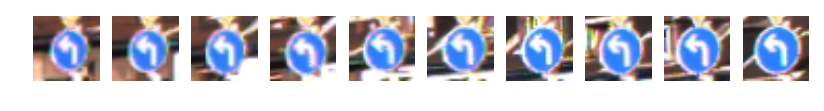

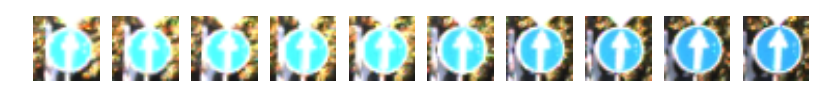

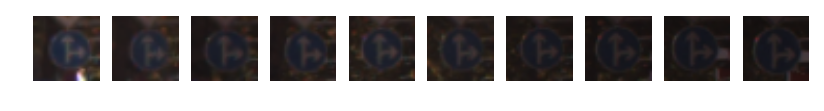

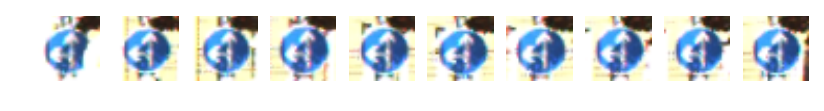

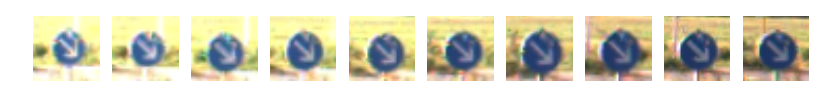

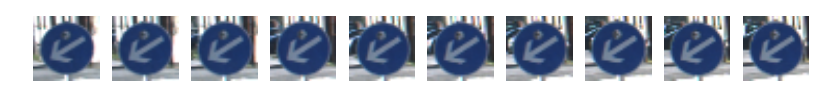

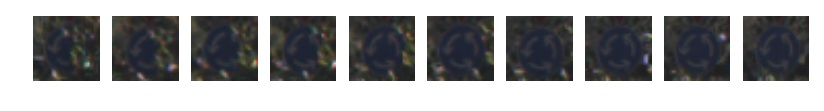

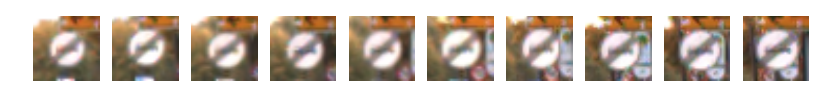

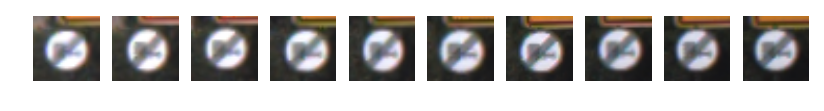

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# Visualizations will be shown in the notebook.
%matplotlib inline

samples = []
for l in range(n_classes):
    samples.append(np.where(y_train == l)[0][:10])
    
for i, sample in enumerate(samples):
    gs1 = gridspec.GridSpec(1, 10)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.
    plt.figure(figsize=(10,2))
    for i in range(10):
        ax1 = plt.subplot(gs1[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        plt.subplot(1,10,i+1)
        plt.imshow(X_train[sample[i]])
        plt.axis('off')

    plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


def normalize_image(X, max_value=255, min_value=0, lower=0, upper=1.0):
    return lower + (X-min_value)*(upper - lower)/(max_value - min_value)


def pre_process_image(image):
    image[:,:,0] = cv2.equalizeHist(image[:,:,0])
    image[:,:,1] = cv2.equalizeHist(image[:,:,1])
    image[:,:,2] = cv2.equalizeHist(image[:,:,2])
    image = image/255.-.5
    return image

X_train_pre = np.array([pre_process_image(X_train[i]) for i in range(n_train)], dtype=np.float32)
X_test_pre = np.array([pre_process_image(X_test[i]) for i in range(n_test)], dtype=np.float32)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** I performed histogram equalization on each channel of the images to remove the effect of brightness. The pixel values were also scaled to be between 0 and 1.

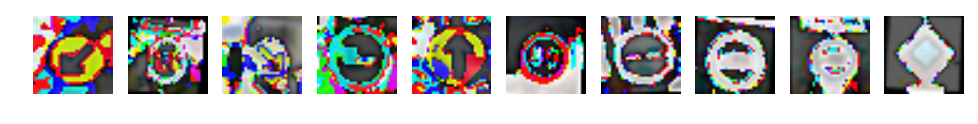

In [5]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range,brightness=0):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness


    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    if brightness == 1:
      img = augment_brightness_camera_images(img)

    return img

def generate_additional_data(X, y, n_each, angle_range, shear_range, trans_range):
    """Generate additional data by generating transformation of original data set"""
    X_aug, y_aug = [], []
    for i in range(len(X)):
        for _ in range(n_each):
            img = transform_image(X[i], angle_range, shear_range, trans_range, brightness=1)
            X_aug.append(img)
            y_aug.append(y[i])
    
    X_aug = np.array(X_aug, dtype=np.float32)
    y_aug = np.array(y_aug, dtype=np.int32)
    
    # shuffle indicies
    random_idx = np.arange(len(X_aug))
    np.random.shuffle(random_idx)
    
    # shuffle features and labels using random indicies
    X_aug = X_aug[random_idx]
    y_aug = y_aug[random_idx]
    
    return X_aug, y_aug
    

# generate validation set from training set
X_tr, X_val, y_tr, y_val = train_test_split(X_train_pre, y_train, test_size=0.2)    

# shuffle training set
X_tr, y_tr = shuffle(X_tr, y_tr)

# generate additional data
X_tr_g, y_tr_g = generate_additional_data(X_tr, y_tr, n_each=5, angle_range=10, shear_range=2, trans_range=2)

fig, axes = plt.subplots(1,10, figsize=(12,3))
for i in range(10):
    axes[i].imshow(X_tr_g[i])
    axes[i].axis('off')

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** I ended up allocating 20% of the original training set to be used for validation. With the remaining 80% of the training set I generated 10 jittered images for each original image. This effectively increased the training set by 10x. The jittering operation applied rotation, translation, shear, and brightness augmentation. The functions I used for generating the transformations and applying brightness augmentation were originally developed [here](https://github.com/vxy10/ImageAugmentation).

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

def conv2d(x, filter, input_channels, output_channels, pooling=False):
    """
    Helper method for creating 2D convolution layer.
    
    :param x: input features
    :param filter: (tuple) shape of filter
    :param input_channels: (int) input channels
    :param output_channels: (int) output channels
    :param pooling: (bool) apply max pooling
    :return: layer, weights
    """
    h = x
    
    # compute shape of weights
    shape = filter + [input_channels] + [output_channels]
    
    # create weights and bias variables
    weights = tf.Variable(tf.truncated_normal(shape=shape, mean=0, stddev=0.1))
    biases = tf.Variable(tf.constant(0.05, shape=[output_channels]))
    
    h = tf.nn.conv2d(h, weights, strides=[1,1,1,1], padding='SAME') + biases
    
    if pooling:
        h = tf.nn.max_pool(h, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    
    h = tf.nn.relu(h)
    
    return h, weights


def flatten(x):
    """Flatten layer"""
    return tf.contrib.layers.flatten(x)

def fully_connected(x, input_channels, output_channels, activation=False):
    h = x
    
    weights = tf.Variable(tf.truncated_normal(shape=[input_channels, output_channels], mean=0, stddev=0.1))
    biases = tf.Variable(tf.constant(0.05, shape=[output_channels]))
    
    h = tf.matmul(h, weights) + biases
    
    if activation:
        h = tf.nn.relu(h)
        
    return h, weights

def model(x, keep_prob):
    conv1, Wconv1 = conv2d(x, filter=[1,1], input_channels=3, output_channels=3)
    
    conv2, Wconv2 = conv2d(conv1, filter=[5,5], input_channels=3, output_channels=16)
    
    conv3, Wconv3 = conv2d(conv2, filter=[5,5], input_channels=16, output_channels=16, pooling=True)
    
    conv3 = tf.nn.dropout(conv3, keep_prob)
    
    flat3 = flatten(conv3)
    
    conv4, Wconv4 = conv2d(conv3, filter=[5,5], input_channels=16, output_channels=32)
    
    conv5, Wconv5 = conv2d(conv4, filter=[5,5], input_channels=32, output_channels=32)
    
    conv5 = tf.nn.dropout(conv5, keep_prob)
    
    flat5 = flatten(conv5)
    
    fc0 = tf.concat(1, [flat3, flat5])
    
    fc1, Wfc1 = fully_connected(fc0, input_channels=12288, output_channels=256)

    fc2, Wfc2 = fully_connected(fc1, input_channels=256, output_channels=256)

    fc3, Wfc3 = fully_connected(fc2, input_channels=256, output_channels=n_classes, activation=False)
    
    return fc3, [Wconv1, Wconv2, Wconv3, Wconv4, Wconv5, Wfc1, Wfc2, Wfc3]

In [7]:
# features and labels
x = tf.placeholder(tf.float32, [None, 32, 32, 3])
y = tf.placeholder(tf.int32, [None])
y_ = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** I ended up going with an architecture that was similar to that described in the traffic sign paper. There seems to be a significant benefit related to feeding the output from the first convolution layer and the second convolution layers directly to the classifier. L2 regularization was applied to all of the weights of the network. Also dropout was applied to the two convolutional stages.

Layer 1 (Input=Image):
    
    - Conv2D 1x1x3 (Relu)
    - Conv2D 5x5x16 (Relu)
    - Conv2D 5x5x16 (Max Pooling 1x2x2x1), (Relu)
    - Dropout

Layer 2 (Input=Layer 1):
    
    - Conv2D 5x5x32 (Relu)
    - Conv2D 5x5x32 (Max Pooling 2x2) (Relu)
    - Dropout

Layer 3 (Input=Layer 1, Layer 2):
    
    - Flatten(Layer 1, Layer2)

Layer 4 (Input=Layer 3): 
    
    - Fully Connected 12288x256

Layer 5 (Input=Layer 4):
    
    - Fully Connected 256x256

Layer 6 (Input=Layer 5):
    
    - Fully Connected 256x43

In [9]:
### Train your model here.
### Feel free to use as many code cells as needed.

# Hyperparameter
RATE = 1e-3

# define loss operation
logits, weights = model(x, keep_prob)

regularizers = sum([tf.nn.l2_loss(w) for w in weights])
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, y_)
loss_operation = tf.reduce_mean(cross_entropy) + 1e-5*regularizers 

# select optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=RATE)
training_operation = optimizer.minimize(loss_operation)

In [10]:
### Error definition here

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [11]:
### Model is trained here

# Hyperparameters
EPOCHS = 10
BATCH_SIZE = 128

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_tr_g)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_tr_g[offset:end], y_tr_g[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate(X_val, y_val)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...



EPOCH 1 ...
Validation Accuracy = 0.950



EPOCH 2 ...
Validation Accuracy = 0.984



EPOCH 3 ...
Validation Accuracy = 0.987



EPOCH 4 ...
Validation Accuracy = 0.988



EPOCH 5 ...
Validation Accuracy = 0.989



EPOCH 6 ...
Validation Accuracy = 0.991



EPOCH 7 ...
Validation Accuracy = 0.992



EPOCH 8 ...
Validation Accuracy = 0.988



EPOCH 9 ...
Validation Accuracy = 0.992



EPOCH 10 ...
Validation Accuracy = 0.990



Model saved


In [12]:
### Model evaluation against test set

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.941


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** I used the AdamOptimizer with a learning rate of 0.001. The loss function was defined as the sum of the cross entropy and the 1e-5 times the L2 norm of the weights. For training, 10 epochs were used with a batch size of 128. These yielded the best performance. Also during training the dropout keep probability was set to 0.5.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I attempted to use the LeNet architecture without data augmentation and it was able to achieve around 91% classification accuracy. When applied the trained network to the test data set I was only able to achieve an accuracy of 81%. With these results I decided to try a network with similar architecture to that described in the traffic sign paper. The major concept there was the introduction of connecting both the first convolutional stage and second convolutional stage to the classifier. By adding this and increasing the depth of the network the performance immediately improved from 91% to 99% on the validation set. The final step was generating jittered images that would make the classifier more robust to distortions in the image. With the jittered images the classifier was able to achieve 94.1% accuracy on the test set.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

240
255
216
255
215


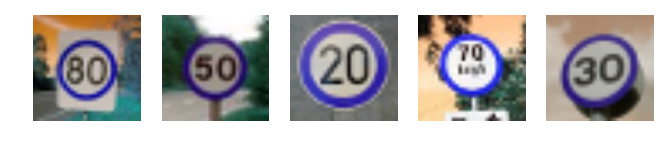

In [16]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
from matplotlib.image import imread
import matplotlib.gridspec as gridspec

image_directory = "new_images/formatted/"
images = [os.path.join(image_directory, name) for name in os.listdir(image_directory)]

X_new = []
y_new = []
for fn in images:
    # read image and get label from file name
    image = cv2.imread(fn)
    label = os.path.split(os.path.splitext(fn)[0])[-1]
    
    print(np.max(image))
    
    # append feature and label to list
    X_new.append(image)
    y_new.append(label)

# plot images
gs1 = gridspec.GridSpec(1, 5)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.
plt.figure(figsize=(8,2))
for i in range(len(X_new)):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    plt.subplot(1,5,i+1)
    plt.imshow(X_new[i])
    plt.axis('off')

plt.show()
    
# convert to numpy arrays of correct type
X_new_pre = np.array([pre_process_image(X_new[i]) for i in range(len(X_new))])
y_new = np.array(y_new, dtype=np.int32)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** I ended up selecting 5 speed limit signs from the internet. Most of them are very clear images, however, the 70 km/h sign is low quality so the classifier may strugle with identifying features. Also the images were read in BGR format instead of RGB.

In [17]:
### Run the predictions here.
top_k_op = tf.nn.top_k(logits, k=5)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_new_pre, y_new)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    top_5k = sess.run(top_k_op, feed_dict={x:X_new_pre, y:y_new, keep_prob:1.0})
    print(top_5k)

Test Accuracy = 0.600
TopKV2(values=array([[ 41.86295319,  39.54534912,  37.73334122,  34.21054077,
         32.17420578],
       [ 27.82818794,  22.90265846,  20.1090126 ,  19.60571098,
         13.88388252],
       [ 29.50810432,  28.11020088,  23.69458961,  21.79748154,
         20.63733864],
       [ 21.59956932,  21.14216423,  19.69095039,  17.94024467,
         15.79253864],
       [ 47.51514053,  39.95106125,  31.50247574,  31.36872864,
         24.91477394]], dtype=float32), indices=array([[14,  5,  2,  3,  1],
       [ 2,  3,  1,  5,  4],
       [ 0,  3, 16, 40,  1],
       [ 2,  9, 15, 40, 12],
       [ 1,  2, 40,  5,  4]], dtype=int32))


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** The model was able to succesfully predict 60% of the images. 

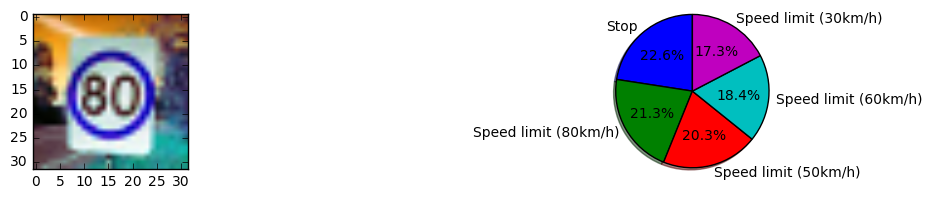

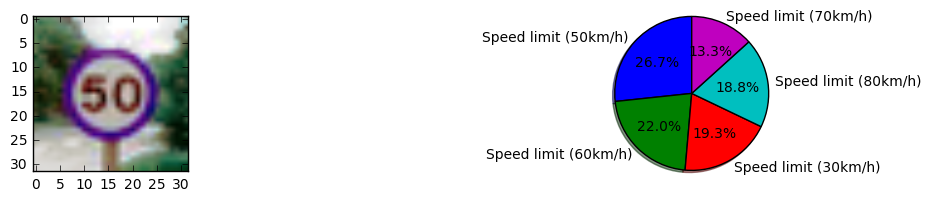

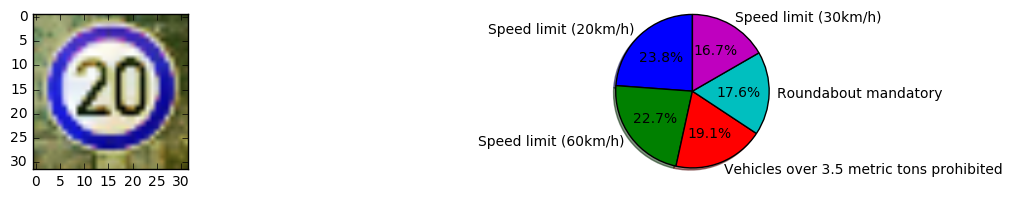

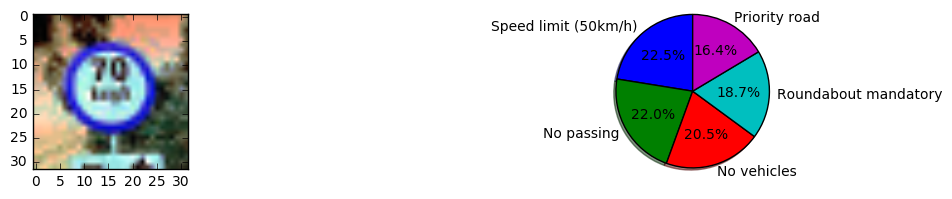

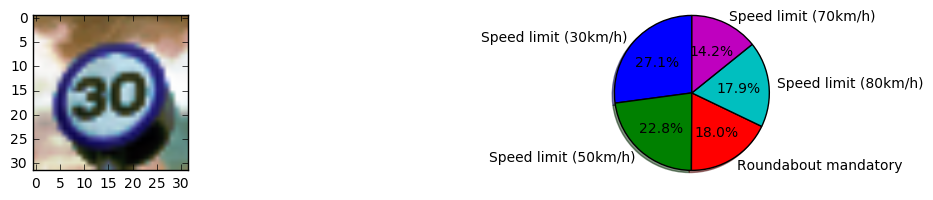

In [18]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
import pandas as pd

sign_data = pd.read_csv("signnames.csv")
sign_map = dict(zip(sign_data['ClassId'], sign_data['SignName']))

for indices, values, image in zip(top_5k.indices, top_5k.values, X_new):
    translations = [sign_map[i] for i in indices]
    sizes = np.divide(values, np.sum(values)) * 100.
    
    # generate pie chart
    fig, axes = plt.subplots(1, 2, figsize=(10, 2))
    axes[0].imshow(image)
    axes[1].pie(sizes, labels=translations, autopct='%1.1f%%',
            shadow=True, startangle=90)
    axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    fig.subplots_adjust(wspace=2)
    
    plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** The model had difficulty with the 70 km/h sign due to the low quality of the image. It also misclassified the 80 km/h sign as a stop sign although the second highest probaility was correct. From looking at the spread it appears as though the model is most confident with 50 km/h and 30 km/h signs.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.